# Belarus Car Price Prediction

## Objective

The goal of this project is to develop a machine learning model to **predict the price of cars in Belarus** based on various vehicle attributes. By analyzing key features such as brand, model year, engine specifications, fuel type, transmission, mileage, drive unit, color, and segment, the project aims to:

- Accurately predict car prices in USD.
- Identify the most influential features affecting car pricing.

## Dataset Overview

The dataset, sourced from **Kaggle**, contains **56,244 rows** and **12 columns**. It includes detailed information on a wide range of vehicles listed for sale in Belarus.

## Data Dictionary

| Variable         | Description                                                   |
|------------------|---------------------------------------------------------------|
| `make`           | Car manufacturer or brand                                     |
| `model`          | Specific model of the car                                     |
| `price USD`      | Price of the car in USD (target variable)                     |
| `year`           | Year of production                                            |
| `condition`      | Condition at the time of sale (e.g., with mileage, for parts) |
| `mileage`        | Total kilometers driven                                       |
| `fuel type`      | Type of fuel (e.g., petrol, diesel, electric)                 |
| `volume(cm3)`    | Engine volume in cubic centimeters                            |
| `color`          | Exterior color of the vehicle                                 |
| `transmission`   | Type of transmission (e.g., manual, automatic)                |
| `drive unit`     | Drive configuration (e.g., front-wheel, all-wheel)            |
| `segment`        | Market segment classification of the car                      |


In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# loading Dataset

df = pd.read_csv('cars.csv')
df.head()

,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


#### Data Preprocessing Part 1

In [3]:
df.shape

(56244, 12)

In [4]:
df.dtypes

make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

In [5]:
# droping uncessary columns

df.drop(columns = ['model','segment'],inplace = True)

In [6]:
# Unique values in the columns

df.nunique()

make                     96
priceUSD               2970
year                     78
condition                 3
mileage(kilometers)    8400
fuel_type                 3
volume(cm3)             458
color                    13
transmission              2
drive_unit                4
dtype: int64

In [7]:
df.make.unique()

array(['mazda', 'mg', 'renault', 'gaz', 'aro', 'rover', 'uaz',
       'alfa-romeo', 'audi', 'oldsmobile', 'saab', 'peugeot', 'chrysler',
       'wartburg', 'moskvich', 'volvo', 'fiat', 'roewe', 'porsche', 'zaz',
       'luaz', 'dacia', 'lada-vaz', 'izh', 'raf', 'bogdan', 'bmw',
       'nissan', 'mercedes-benz', 'mitsubishi', 'toyota', 'chery', 'gmc',
       'hyundai', 'honda', 'ssangyong', 'suzuki', 'opel', 'seat',
       'volkswagen', 'daihatsu', 'chevrolet', 'geely', 'saturn', 'kia',
       'lincoln', 'eksklyuziv', 'citroen', 'dong-feng', 'pontiac', 'ford',
       'subaru', 'bentley', 'faw', 'cadillac', 'lifan', 'plymouth',
       'hafei', 'shanghai-maple', 'mini', 'jeep', 'skoda', 'mercury',
       'changan', 'lexus', 'isuzu', 'aston-martin', 'lancia',
       'great-wall', 'land-rover', 'jaguar', 'buick', 'daewoo', 'vortex',
       'infiniti', 'byd', 'smart', 'maserati', 'haval', 'acura', 'scion',
       'tata', 'datsun', 'tesla', 'mclaren', 'ravon', 'trabant', 'proton',
       'fso

Since there are many different car brands, it’s hard to analyze each one separately. So, I will group them into categories based on the brand and the country they come from. The categories are: Luxury European, Mainstream European, Russian/Eastern European, Asian, American, Speciality, and Other.

In [8]:
# Categorizing the car make

def car_make(make):
    make = make.lower()  
    if make in ['mazda', 'mg', 'rover', 'alfa-romeo', 'audi', 'peugeot', 'chrysler', 'bmw', 'aston-martin', 'jaguar', 'land-rover']:
        return 'Luxury European'
    elif make in ['renault', 'dacia', 'citroen', 'volvo', 'fiat', 'opel', 'seat', 'volkswagen', 'skoda', 'mini', 'smart']:
        return 'Mainstream European'
    elif make in ['gaz', 'aro', 'lada-vaz', 'izh', 'raf', 'bogdan', 'moskvich', 'uaz', 'luaz', 'wartburg', 'trabant', 'proton', 'fso', 'jac', 'iran-khodro', 'zotye', 'tagaz', 'saipa', 'brilliance']:
        return 'Russian/Eastern European'
    elif make in ['toyota', 'nissan', 'asia', 'mitsubishi', 'chery', 'hyundai', 'honda', 'ssangyong', 'suzuki', 'daihatsu', 'kia', 'changan', 'lexus', 'isuzu', 'great-wall', 'daewoo', 'vortex', 'infiniti', 'byd', 'geely', 'haval', 'acura', 'scion', 'tata', 'datsun', 'ravon']:
        return 'Asian'
    elif make in ['oldsmobile', 'gmc', 'plymouth', 'ford', 'cadillac', 'jeep', 'mercury', 'lincoln', 'buick', 'saturn', 'pontiac', 'chevrolet']:
        return 'American'
    elif make in ['porsche', 'bentley', 'maserati', 'tesla', 'mclaren']:
        return 'Specialty'
    else:
        return 'Other'

# Apply the function
df['make_segment'] = df['make'].apply(car_make)


In [9]:
df.describe()

,priceUSD,year,mileage(kilometers),volume(cm3)
count,56244.000000,56244.000000,5.624400e+04,56197.000000
mean,7415.456440,2003.454840,2.443956e+05,2104.860615
std,8316.959261,8.144247,3.210307e+05,959.201633
min,48.000000,1910.000000,0.000000e+00,500.000000
25%,2350.000000,1998.000000,1.370000e+05,1600.000000
50%,5350.000000,2004.000000,2.285000e+05,1996.000000
75%,9807.500000,2010.000000,3.100000e+05,2300.000000
max,235235.000000,2019.000000,9.999999e+06,20000.000000


In [10]:
df.head()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
0,mazda,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,Luxury European
1,mazda,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,Luxury European
2,mazda,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,Luxury European
3,mazda,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,Luxury European
4,mazda,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,Luxury European


In [11]:
df.tail()

,make,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,make_segment
56239,lancia,3650,2000,with mileage,290000.0,petrol,2000.0,other,mechanics,front-wheel drive,Other
56240,lancia,4100,1999,with mileage,340000.0,diesel,2100.0,blue,mechanics,front-wheel drive,Other
56241,lancia,3600,1997,with mileage,354000.0,diesel,2100.0,burgundy,mechanics,front-wheel drive,Other
56242,lancia,3000,1997,with mileage,350000.0,petrol,2000.0,blue,mechanics,front-wheel drive,Other
56243,lancia,2950,1996,with mileage,3.0,petrol,2000.0,burgundy,mechanics,front-wheel drive,Other


### Exploratory Data Analysis

C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Temp\ipykernel_4768\1266227880.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


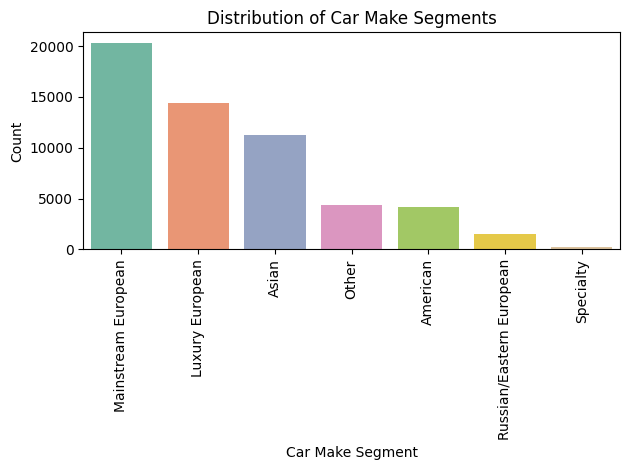

In [12]:
#### Car Make Segment

# Count the occurrences of each car make segment
make_counts = df['make_segment'].value_counts().reset_index()
make_counts.columns = ['make_segment', 'count']

# Plot with custom color palette
sns.barplot(
    x='make_segment',
    y='count',
    data=make_counts,
    palette='Set2' 
)

plt.xticks(rotation=90)
plt.title("Distribution of Car Make Segments")
plt.xlabel("Car Make Segment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

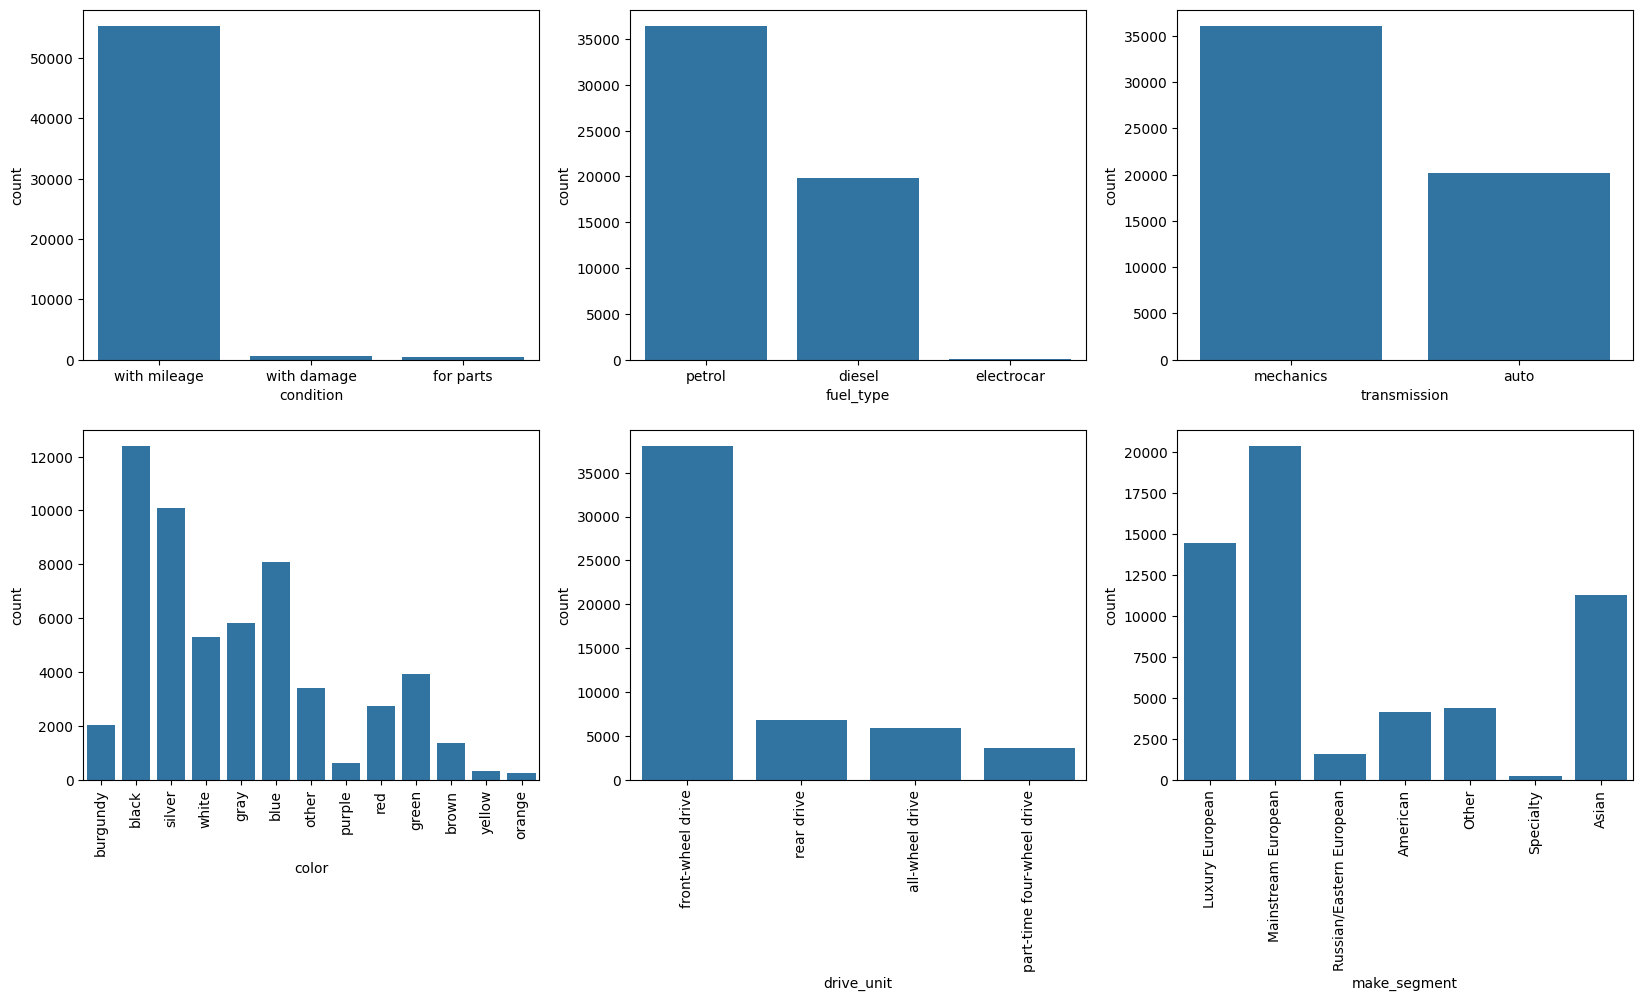

In [13]:
### Categorical Variable Distribution

fig, ax = plt.subplots(2,3,figsize=(20,10))
sns.countplot(x='condition', data=df, ax=ax[0,0])
sns.countplot(x='fuel_type', data=df, ax=ax[0,1])
sns.countplot(x='transmission', data=df, ax=ax[0,2])
sns.countplot(x='color', data=df, ax=ax[1,0])
ax[1,0].tick_params(axis='x', rotation=90)
sns.countplot(x='drive_unit', data=df, ax=ax[1,1])
ax[1,1].tick_params(axis='x', rotation=90)
sns.countplot(x='make_segment', data=df, ax=ax[1,2])
ax[1,2].tick_params(axis='x', rotation=90)

<Axes: xlabel='volume(cm3)', ylabel='Count'>

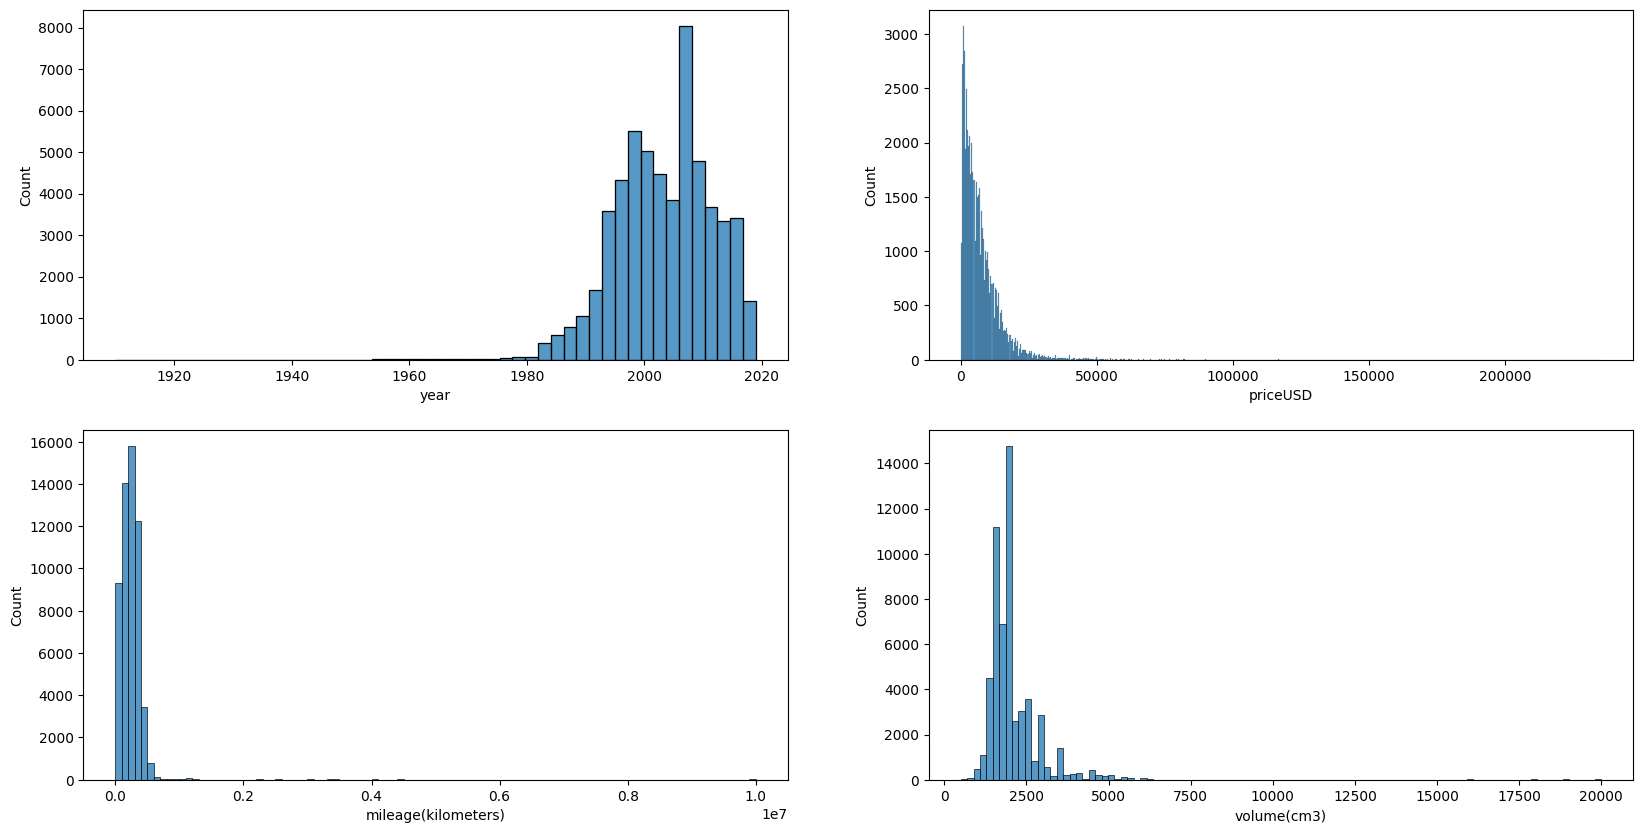

In [14]:
### Continuous Variable Distribution

fig, ax = plt.subplots(2,2,figsize=(20,10))
sns.histplot (df['year'], ax=ax[0,0], bins = 50)
sns.histplot(df['priceUSD'], ax=ax[0,1])
sns.histplot(df['mileage(kilometers)'], ax=ax[1,0], bins = 100)
sns.histplot(df['volume(cm3)'], ax=ax[1,1], bins = 100)


In [15]:
df= df[df['year']>1980]

C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Temp\ipykernel_4768\1097946180.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='make', x='priceUSD', data=demodf,palette = 'Set1')


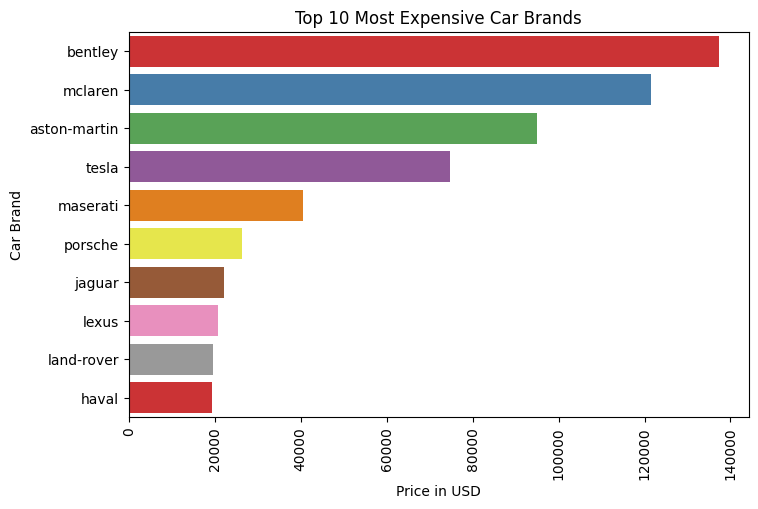

In [16]:
### Price and Make


demodf = df.groupby('make')['priceUSD'].mean().reset_index()
demodf = demodf.sort_values(by='priceUSD', ascending=False).head(10)

#b Bar Plot
plt.figure(figsize=(8,5))
sns.barplot(y='make', x='priceUSD', data=demodf,palette = 'Set1')
plt.xticks(rotation=90)
plt.title('Top 10 Most Expensive Car Brands')
plt.ylabel('Car Brand')
plt.xlabel('Price in USD')
plt.show()

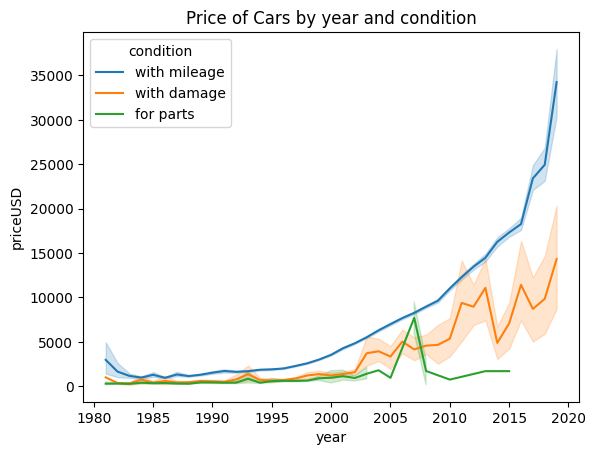

In [17]:
### Price and Condition

sns.lineplot(x= 'year', y = 'priceUSD', data= df , hue = 'condition')
plt.title('Price of Cars by year and condition')
plt.show()

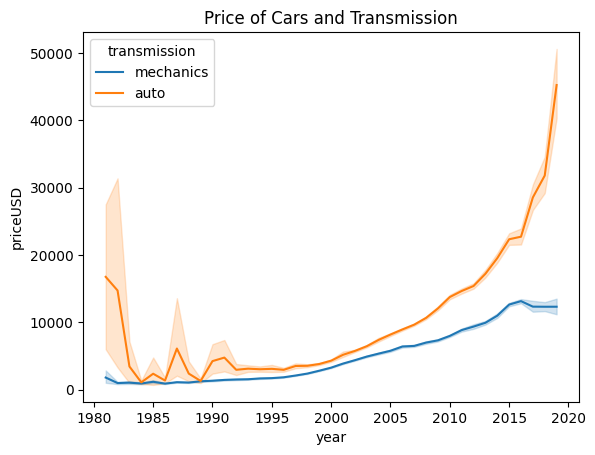

In [18]:
### Price and Transmission

sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'transmission')
plt.title('Price of Cars and Transmission')
plt.show()

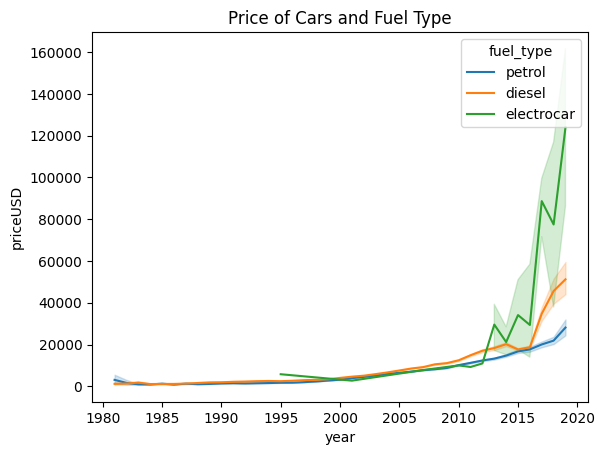

In [19]:
### Price and Fuel Type

sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'fuel_type')
plt.title('Price of Cars and Fuel Type')
plt.show()

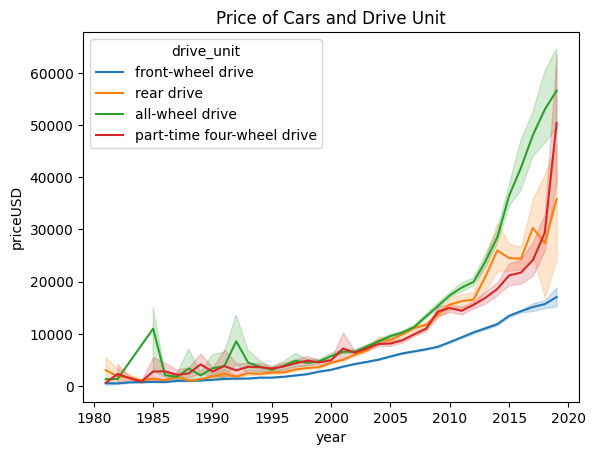

In [20]:
### Price and Drive Unit

sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'drive_unit')
plt.title('Price of Cars and Drive Unit')
plt.show()


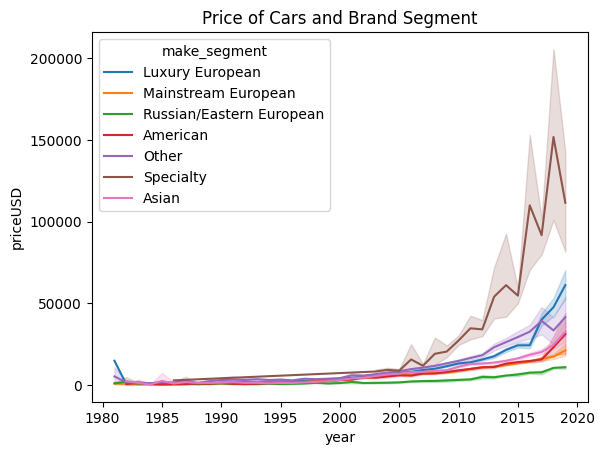

In [21]:
### Price and Brand Segment
sns.lineplot(x = 'year', y = 'priceUSD', data = df, hue = 'make_segment')
plt.title('Price of Cars and Brand Segment')
plt.show()

#### Data Preprocessing Part 2

In [22]:
# Checking Null values
df.isnull().sum()

make                      0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1874
make_segment              0
dtype: int64

In [23]:
df.dropna(inplace=True)


In [24]:
df.drop(columns=['make'], inplace=True)


In [25]:
# Label encoding for object data type

from sklearn.preprocessing import LabelEncoder

# columns to encode
cols = ['condition', 'fuel_type', 'transmission', 'color', 'drive_unit', 'make_segment']

# Label encoding Object 
le = LabelEncoder()

#label encoding for each column
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

condition [2 1 0]
fuel_type [1 0]
transmission [1 0]
color [ 3  0 10 11  4  1  7  8  9  5  2 12  6]
drive_unit [1 3 0 2]
make_segment [2 3 5 0 4 6 1]


<Axes: >

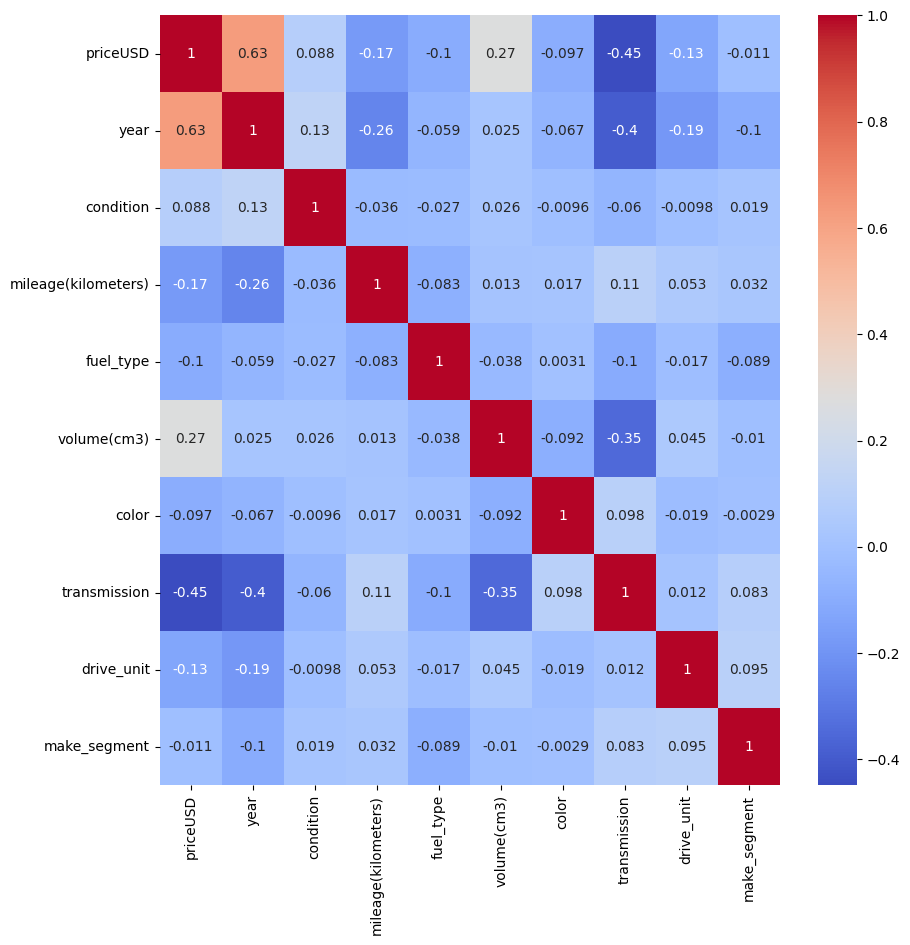

In [26]:
# Correlation Matrix Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


In [27]:
# Removing Outlier

from scipy import stats

z = np.abs(stats.zscore(df))

threshold = 3

#columns with outliers
cols = ['year', 'mileage(kilometers)', 'volume(cm3)']

#removing outliers
df = df[(z < 3).all(axis=1)]

In [28]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['priceUSD']), df['priceUSD'], test_size=0.2, random_state=42)

In [29]:
# Model Buliding

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [30]:
# Hypertuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

#parameters for grid search
params = {
    'max_depth': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0,42]
}
# Grid Search Object
grid = GridSearchCV(dtr, param_grid=params, cv=5, verbose=1, n_jobs=-1)

#fitting the grid search
grid.fit(X_train, y_train)

#best parameters
print(grid.best_params_)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
640 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
640 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 0}


C:\Users\ROSHAN KUMAR SHAKYA\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.30902003 0.293469   0.30902003 0.293469
 0.30902003 0.293469   0.30902003 0.293469   0.30902003 0.293469
 0.30902003 0.293469   0.30902003 0.293469   0.30902003 0.293469
 0.30902003 0.293469   0.30902003 0.293469   0.30902003 0.293469
 0.30902003 0.293469   0.30902003 0.293469   0.30902003 0.293469
 0.30902003 0.293469   0.30902003 0.293469   0.30902003 0.293469
 0.30902003 0.293469   0.30902003 0.293469   0.30902003 0.293469
 0.30902003 0.293469  

In [31]:
#decision tree regressor with best parameters
dtr = DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, random_state=0)

#fitting the model
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=4,
                      random_state=0)

In [32]:
#training score
dtr.score(X_train, y_train)

0.7883902435486847

In [33]:
#predicting the test set
y_pred = dtr.predict(X_test)

#### Model Evaluation


In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('R2 Score: ', r2_score(y_test, y_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score:  0.7701494431533182
Mean Squared Error:  7355859.020309841
Mean Absolute Error:  1869.2406549663542
Root Mean Squared Error:  2712.168693188136


In [35]:
### Feature Imp

feat_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': dtr.feature_importances_})
feat_df = feat_df.sort_values(by='Importance', ascending=False)
feat_df

,Feature,Importance
0,year,0.387447
6,transmission,0.320538
2,mileage(kilometers),0.167548
4,volume(cm3),0.053433
3,fuel_type,0.041817
8,make_segment,0.015295
7,drive_unit,0.008188
5,color,0.005734
1,condition,0.000000


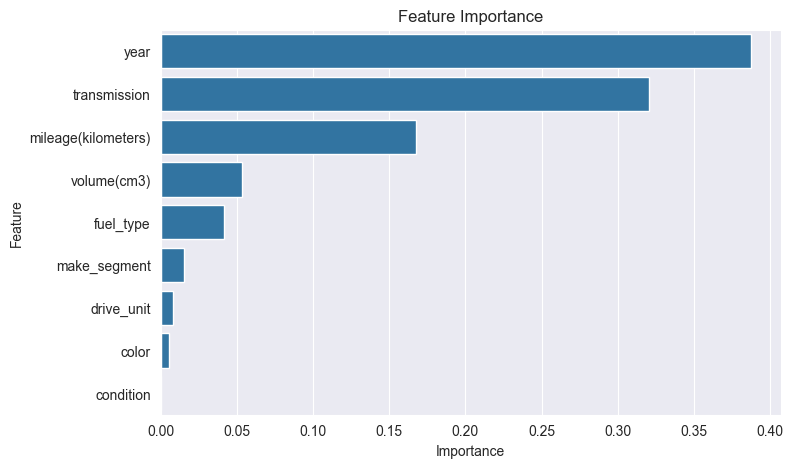

In [36]:
# Bar Plot
sns.set_style('darkgrid')
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()

## 📊 Decision Tree Regressor - Car Price Prediction

### ✅ Model Performance Summary

The **Decision Tree Regressor** model was used to predict car prices. The model achieved the following evaluation results:

- **R² Score**: `0.77`  
  > This indicates that **77% of the variance** in car prices can be explained by the model features. While this is a reasonably good fit, **23% of the variance remains unexplained**, indicating scope for improvement.

- **Mean Squared Error (MSE)**: `7,355,859.02`
- **Mean Absolute Error (MAE)**: `1869.24`
- **Root Mean Squared Error (RMSE)**: `2712.17`

> 🔎 **Interpretation**:
> - **RMSE** tells us that the model’s predictions deviate from the actual prices by about **2712.17 units** on average.
> - **MAE** indicates that the average absolute error is around **1869.24 units**.
> - The fact that **RMSE > MAE** suggests the presence of **some larger errors**, as RMSE penalizes larger deviations more heavily.

---

### 🔍 Feature Importance Analysis

The model also provides insight into how influential each feature is in predicting car price:

| Rank | Feature              | Importance Score |
|------|----------------------|------------------|
| 1    | **Year**             | `0.387`          |
| 2    | **Transmission**     | `0.320`          |
| 3    | **Mileage (km)**     | `0.168`          |
| 4    | **Engine Volume (cm³)** | `0.053`      |

> ⚠️ A common misconception was that **"Year and Engine Volume"** were the most important features.  
> ✅ The correct ranking based on model output is:
> - **Year**
> - **Transmission**
> - **Mileage**
> - **Engine Volume**

---

### 🧠 Conclusion

- ✅ The decision tree model explains approximately **77% of the variance** in car prices.
- 📉 Prediction errors are around **1869.24 units (MAE)** and **2712.17 units (RMSE)**.
- 🔍 The **most important features** influencing the car price are:
  1. **Year**
  2. **Transmission**
  3. **Mileage**
  4. **Engine Volume**

> ℹ️ **Note**: In decision trees, feature importance reflects the reduction in variance (impurity) due to that feature. A higher importance score means that the feature contributes more to improving prediction accuracy by influencing decision splits in the tree.
